In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, multilabel_confusion_matrix

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# sklearn здесь только, чтобы разделить выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split

In [2]:
### Шаг 1. Определение функций, которые понадобяться для обучения
# преобразование массива в бинарный вид результатов
def to_one_hot(Y):
    n_col = np.amax(Y) + 1
    binarized = np.zeros((len(Y), n_col))
    for i in range(len(Y)):
        binarized[i, Y[i]] = 1.
    return binarized

# преобразование массива в необходимый вид
def from_one_hot(Y):
    arr = np.zeros((len(Y), 1))

    for i in range(len(Y)):
        l = layer2[i]
        for j in range(len(l)):
            if(l[j] == 1):
                arr[i] = j+1
    return arr

# сигмоида и ее производная
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x)*(1 - sigmoid(x))

# нормализация массива
def normalize(X, axis=-1, order=2):
    l2 = np.atleast_1d(np.linalg.norm(X, order, axis))
    l2[l2 == 0] = 1
    return X / np.expand_dims(l2, axis)

In [3]:
### Шаг 2. Подготовка тренировочных данных
# получения данных из csv файла. укажите здесь путь к файлу Iris.csv
iris_data = pd.read_csv("../input/Iris.csv")
iris_data.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
# замена текстовых значений на цифровые
iris_data['Species'].\
    replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# формирование входных данных
columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
x = pd.DataFrame(iris_data, columns=columns)
x = normalize(x.to_numpy())

# формирование выходных данных(результатов)
columns = ['Species']
y = pd.DataFrame(iris_data, columns=columns)
y = y.to_numpy()
y = y.flatten()
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [5]:
def nero(X_tr, y_tr, step_count=10000, lerning_rate=0.01):
    ### Шаг 3. Обученние нейронной сети
    # присваивание случайных весов
    w0 = 2*np.random.random((4, 5)) - 1 # для входного слоя   - 4 входа, 5 выхода
    w1 = 2*np.random.random((5, 3)) - 1 # для внутреннего слоя - 5 входов, 3 выхода

    # массив для ошибок, чтобы потом построить график
    errors = []

    # процесс обучения
    for i in range(step_count):

        # прямое распространение(feed forward)
        layer0 = X_tr
        layer1 = sigmoid(np.dot(layer0, w0))
        layer2 = sigmoid(np.dot(layer1, w1))

        # обратное распространение(back propagation) с использованием градиентного спуска
        layer2_error = y_tr - layer2
        layer2_delta = layer2_error * sigmoid_deriv(np.dot(layer1, w1))

        layer1_error = layer2_delta.dot(w1.T)
        layer1_delta = layer1_error * sigmoid_deriv(np.dot(layer0, w0))

        w1 += layer1.T.dot(layer2_delta) * lerning_rate
        w0 += layer0.T.dot(layer1_delta) * lerning_rate

        error = np.mean(np.abs(layer2_error))
        errors.append(error)
        accuracy = (1 - error) * 100
        
    plt.plot(errors)
    plt.xlabel('Обучение')
    plt.ylabel('Ошибка')        
    print("Точность нейронной сети " + str(round(accuracy, 2)) + "%")
        
    return errors, accuracy

Точность нейронной сети 94.33%


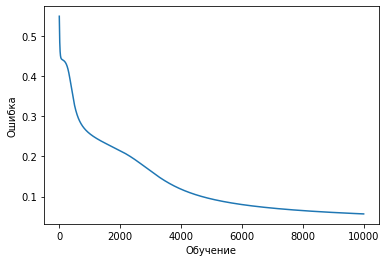

In [6]:
e, a = nero(X_train, y_train, 10000, 0.01)

Точность нейронной сети 74.25%


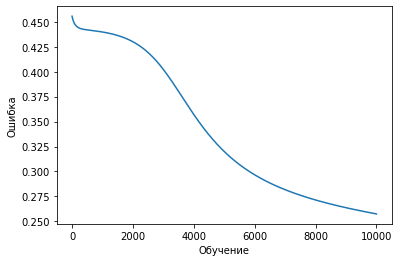

In [7]:
# снизил скорость обучения
e, a = nero(X_train, y_train, 10000, 0.001)

Точность нейронной сети 97.25%


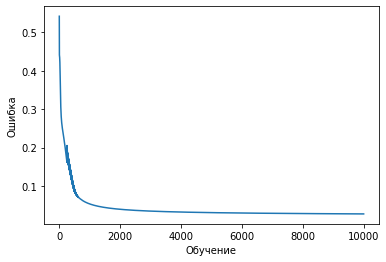

In [8]:
# увеличил скорость обучения
e, a = nero(X_train, y_train, 10000, 0.1)

Точность нейронной сети 74.4%


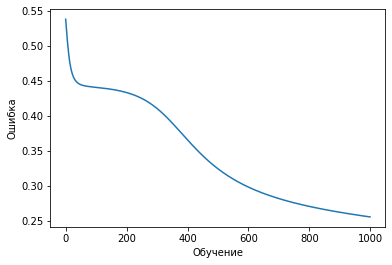

In [9]:
# уменьшил количество итераций
e, a = nero(X_train, y_train, 1000, 0.01)

Точность нейронной сети 97.25%


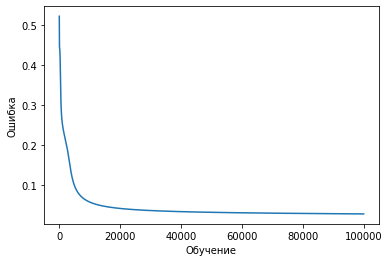

In [10]:
# увеличил количество итераций
e, a = nero(X_train, y_train, 100000, 0.01)

### Выводы

Точности нейронной сети напрямую зависит от коэфициента обучения и имеет обраткую зависимости количеству циклов обчуения